12/30/2023: Working end to end

Import Packages and set environment variables

In [19]:
import os
from dotenv import load_dotenv
load_dotenv('../../.env')

True

Activate Langsmith

In [37]:
from langchain.callbacks.manager import tracing_v2_enabled
from langsmith import Client
client = Client()

LANGCHAIN_TRACING_V2=os.getenv("LANGCHAIN_TRACING_V2")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT="palm-ragfusion-shadow-99"  # if not specified, defaults to "default"
LANGCHAIN_ENDPOINT=os.getenv("LANGCHAIN_ENDPOINT")
OPENAI_API_KEY=OPENAI_API_KEY

Set LLM and Embedding Models

In [72]:
#Import LLM and Embedding Models
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain.embeddings import GooglePalmEmbeddings

In [147]:
llm = GoogleGenerativeAI(model="gemini-pro",temperature=0, google_api_key=os.getenv("GOOGLE_API_KEY"))
embeddings=GooglePalmEmbeddings(model_name="models/embedding-gecko-001",google_api_key=os.getenv("GOOGLE_API_KEY"))

Setup dataframe for notebook

In [148]:
csv_file = "../../ado_backlog_clean.csv"


Pandas AI

In [149]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai import Agent
from pandasai.skills import skill
from pandasai.llm.openai import OpenAI
from pandasai.llm.google_vertexai import GoogleVertexAI

In [150]:
df = SmartDataframe(csv_file, config={"llm": llm, "verbose":True})

In [151]:
df.chat('how many rows are in the dataset')

2023-12-30 22:05:40 [INFO] Question: how many rows are in the dataset
2023-12-30 22:05:40 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 22:05:40 [INFO] Prompt ID: 1de7076a-820b-4bfd-b0a8-0ecd2865eaca
2023-12-30 22:05:40 [INFO] Executing Step 0: CacheLookup
2023-12-30 22:05:41 [INFO] Using cached response
2023-12-30 22:05:41 [INFO] Executing Step 1: PromptGeneration
2023-12-30 22:05:41 [INFO] Executing Step 2: CodeGenerator
2023-12-30 22:05:41 [INFO] Executing Step 3: CachePopulation
2023-12-30 22:05:41 [INFO] Executing Step 4: CodeExecution
2023-12-30 22:05:41 [INFO] Saving charts to c:\Users\Jamal\Documents\AI\pythonvenv\envPython310\AI UI Apps\pandasai\exports\charts\temp_chart.png
2023-12-30 22:05:41 [INFO] 
Code running:
```
num_rows = len(dfs[0])
result = {'type': 'number', 'value': num_rows}
        ```
2023-12-30 22:05:41 [INFO] Executing Step 5: ResultValidation
2023-12-30 22:05:41 [INFO] Answer: {'type': 'number', 'value': 12145}
2023-12-30 22:05:41 [INF

12145

In [81]:
df.chat('Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%.')

2023-12-30 19:43:58 [INFO] Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%.
2023-12-30 19:43:58 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 19:43:58 [INFO] Prompt ID: d02f0997-64fa-491c-8e8c-8630d300fd34
2023-12-30 19:43:59 [INFO] Executing Step 0: CacheLookup
2023-12-30 19:43:59 [INFO] Executing Step 1: PromptGeneration
2023-12-30 19:43:59 [INFO] Using prompt: <dataframe>
dfs[0]:12145x18
Work Item Id,Work Item Type,Project Name,Iteration Path,Assigned To,Area Path,Date,Created Date,Activated Date,Resolved Date,Closed Date,Cycle Time Resolved,Changed Date,Iteration Start Date,Iteration End Date,State,State Category,Is Current
1027305,Bug,6610531077,9093007483,0089447873,8502139095,2023-07-18 00:00:00,2020-08-07 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00

<string>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


2023-12-30 19:44:08 [INFO] Using prompt: <dataframe>
dfs[0]:12145x18
Work Item Id,Work Item Type,Project Name,Iteration Path,Assigned To,Area Path,Date,Created Date,Activated Date,Resolved Date,Closed Date,Cycle Time Resolved,Changed Date,Iteration Start Date,Iteration End Date,State,State Category,Is Current
1027305,Bug,6610531077,9093007483,0089447873,8502139095,2023-07-18 00:00:00,2020-08-07 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2,2021-08-20 00:00:00,2020-08-02 00:00:00,2020-08-14 00:00:00,Closed,Completed,True
1013432,User Story,3859432072,5739122075,0581974634,9723067943,2023-07-18 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-05 00:00:00,2020-08-05 00:00:00,1,2023-03-31 00:00:00,2020-08-02 00:00:00,2020-08-14 00:00:00,Closed,Completed,True
1033357,Bug,7721473001,9539008774,8412542240,7508794445,2023-07-18 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-12 00:00:00,3,2021-08-20 00:00:00,2020-08-02 00:00:00,2020

<string>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


2023-12-30 19:44:14 [INFO] Answer: {'type': 'number', 'value': 289}
2023-12-30 19:44:14 [INFO] Executed in: 16.193991899490356s
2023-12-30 19:44:14 [INFO] Executing Step 6: ResultParsing


289

In [82]:
df.chat('Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 70%, 80%, and 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')

2023-12-30 19:56:25 [INFO] Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 70%, 80%, and 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead
2023-12-30 19:56:25 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 19:56:26 [INFO] Prompt ID: 236839b9-aeda-4e7a-a51a-78f1ee0d17c5
2023-12-30 19:56:26 [INFO] Executing Step 0: CacheLookup
2023-12-30 19:56:26 [INFO] Executing Step 1: PromptGeneration
2023-12-30 19:56:26 [INFO] Using prompt: <dataframe>
dfs[0]:12145x18
Work Item Id,Work Item Type,Project Name,Iteration Path,Assigned To,Area Path,Date,Created Date,Activated Date,Resolved Date,Closed Date,Cycle Time 

'The highest number of work items with a resolved date in the next 6 weeks with a high degree of likelihood is:\n70%: 99.0\n80%: 99.0\n90%: 99.0'

In [17]:
df.chat('waht is the sum of story points in the dataset?')

6276

'c:/Users/Jamal/Documents/AI/pythonvenv/envPython310/exports/charts/temp_chart.png'

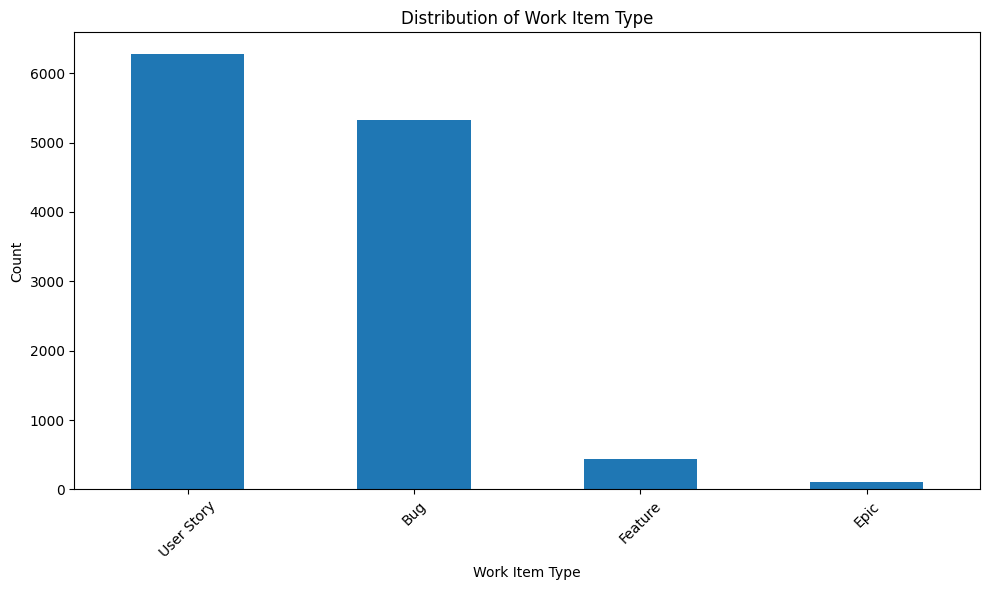

In [13]:
df.chat('plot the distribution of work item type')

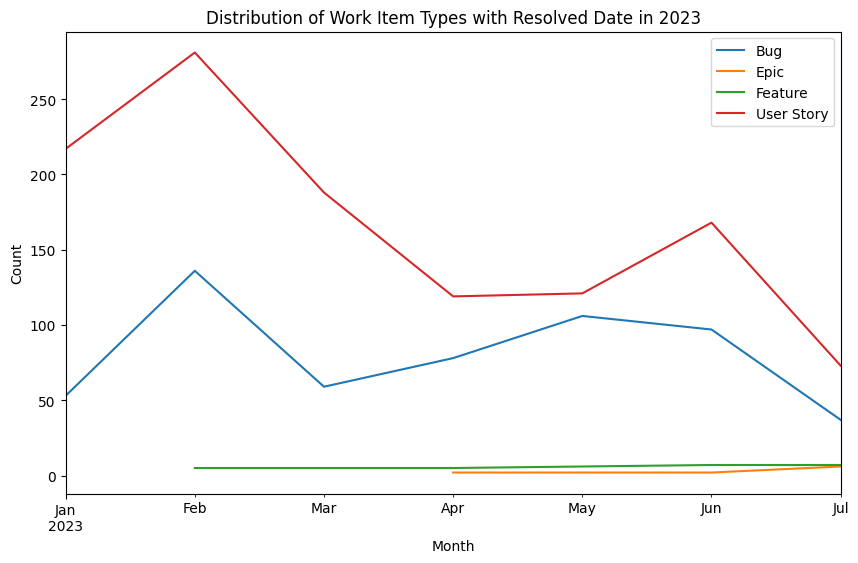

'c:/Users/Jamal/Documents/AI/pythonvenv/envPython310/AI UI Apps/pandasai/exports/charts/temp_chart.png'

In [10]:
df.chat('plot the disttribution of work items types with resolved date in 2023, x axis should be month and legend should be work item type')

In [19]:
df.chat('which are path has the highest number of work items with resolved date in November 2023?')

'Unfortunately, I was not able to answer your question, because of the following error:\n\nCan only use .dt accessor with datetimelike values\n'

fail

PandasAI Agent

In [154]:
agent = Agent([df], config={"llm": llm}, memory_size=10)

In [156]:
agent.chat("how many rows are in the dataframe df?")

2023-12-30 22:08:20 [INFO] Check if the new message is related to the conversation: True
2023-12-30 22:08:20 [INFO] Question: how many rows are in the dataframe df?
2023-12-30 22:08:20 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 22:08:20 [INFO] Prompt ID: f2af49bf-e2ba-46c2-981c-dc7f4e6aa6f5
2023-12-30 22:08:20 [INFO] Executing Step 0: CacheLookup
2023-12-30 22:08:20 [INFO] Executing Step 1: PromptGeneration
2023-12-30 22:08:20 [INFO] Using prompt: <dataframe>
dfs[0]:12145x18
Work Item Id,Work Item Type,Project Name,Iteration Path,Assigned To,Area Path,Date,Created Date,Activated Date,Resolved Date,Closed Date,Cycle Time Resolved,Changed Date,Iteration Start Date,Iteration End Date,State,State Category,Is Current
1027305,Bug,6500259024,5828939775,1587967442,6885299399,2023-07-18 00:00:00,2020-08-07 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-11 00:00:00,2,2021-08-20 00:00:00,2020-08-02 00:00:00,2020-08-14 00:00:00,Closed,Completed,True
1013432,User

12145

In [157]:
agent.chat('Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 70%, 80%, and 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')

2023-12-30 22:09:27 [INFO] Check if the new message is related to the conversation: False
2023-12-30 22:09:27 [INFO] Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 70%, 80%, and 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead
2023-12-30 22:09:27 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 22:09:27 [INFO] Prompt ID: 72170fb5-41a9-4bab-a5e0-83bfb06b1900
2023-12-30 22:09:28 [INFO] Executing Step 0: CacheLookup
2023-12-30 22:09:28 [INFO] Using cached response
2023-12-30 22:09:28 [INFO] Executing Step 1: PromptGeneration
2023-12-30 22:09:28 [INFO] Executing Step 2: CodeGenerator
2023-12-30 22:09:28

'The highest number of work items with a resolved date in the next 6 weeks with a high degree of likelihood is:\n70%: 99.0\n80%: 99.0\n90%: 99.0'

In [158]:
agent.chat('Using the count of resolved date per week as throughput, execute a monte carlo analysis to predict the highest count of work items that can have a resolved date in the next 6 weeks with a degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')

2023-12-30 22:12:52 [INFO] Check if the new message is related to the conversation: True
2023-12-30 22:12:52 [INFO] Question: Using the count of resolved date per week as throughput, execute a monte carlo analysis to predict the highest count of work items that can have a resolved date in the next 6 weeks with a degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead
2023-12-30 22:12:52 [INFO] Running PandasAI with langchain_google_palm LLM...
2023-12-30 22:12:52 [INFO] Prompt ID: 849713c3-dc0c-4a55-88d7-883a5fc37414
2023-12-30 22:12:53 [INFO] Executing Step 0: CacheLookup
2023-12-30 22:12:53 [INFO] Executing Step 1: PromptGeneration
2023-12-30 22:12:53 [INFO] Using prompt: <dataframe>
dfs[0]:12145x18
Work Item Id,Work Item Type,Project Name,Iteration Path,Assigned To,Are

12145

Python LLM Agent

In [60]:
from langchain_experimental.tools import PythonAstREPLTool
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain.llms import OpenAI
from langchain.llms import VertexAI
import vertexai
import pandas as pd
import numpy as np

In [167]:
llm = GoogleGenerativeAI(model="gemini-pro",temperature=0, google_api_key=os.getenv("GOOGLE_API_KEY"))

In [203]:
from langchain.document_loaders import TextLoader, CSVLoader
from langchain.chains.question_answering import load_qa_chain
from langchain.tools import BaseTool

loader = CSVLoader('../../ado_backlog_clean.csv')
docchain = load_qa_chain(llm, chain_type="stuff")

# create document QA tool
class DocumentQATool(BaseTool):
    name='document'
    description='read contents from page content'
    
    def _run(self, query):
        return docchain.run(question=query, input_documents=loader.load(), 
                            return_only_outputs=True, verbose=True)
    
    def _arun(self, query):
        raise NotImplementedError('Not implemented')

In [213]:
df = pd.read_csv('../../ado_backlog_clean.csv')
shape = f"{df.shape[0]} rows x {df.shape[1]} cols" 
dtypes = " | ".join(f"{c}: {d}" for c, d in df.dtypes.items())
pytool = PythonAstREPLTool(locals={"df": df})

In [214]:
from langchain.agents.mrkl.base import ZeroShotAgent
from langchain.chains.llm import LLMChain
from langchain.agents import Tool

In [224]:
# create agent input and prompt Way too many tokens because I think it's trying to put the whole dataframe into the prefix prompt!!!!
tools = [pytool, DocumentQATool()]
input_variables = ["shape","dtypes", "input", "agent_scratchpad"]
        
prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix='''You are working with python pandas DataFrame `df` with shape {shape} and dtypes: {dtypes},
and reading from the document text from the document loader. You should solve
the question by small steps and use the tools available. It is important to understand the attributes and datatypes of the dataframe before working with it. This is the result of running `df.head().to_markdown()`
    ''',
    suffix='''Here's the result of `print(df.head())`:
shape {shape} and dtypes: {dtypes}

You are not meant to use only these rows to answer questions - they are meant as a way of telling you about the shape and schema of the dataframe.
You also do not have use only the information here to answer questions - you can run intermediate queries to do exporatory data analysis to give you more information as needed.
avoide using depracated functions, such as Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, and Passing unit-less datetime64 dtype to .astype is deprecated and will raise errors in a future version thus pass datetime64[ns] instead.

Begin!
Question: {input}
{agent_scratchpad}
    ''', 
    input_variables=input_variables
)
partial_prompt = prompt.partial(shape=shape,dtypes=dtypes) 

llm_chain = LLMChain(
    llm=llm,
    prompt=partial_prompt,
)
tool_names = [tool.name for tool in tools]
zeroshotagent = ZeroShotAgent(
    llm_chain=llm_chain,
    tools=tool_names,
    handle_parsing_errors=True
)

In [225]:
from langchain.agents.agent import AgentExecutor

agent = AgentExecutor.from_agent_and_tools(
    agent=zeroshotagent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True
)

In [226]:
agent.run(input='how many rows are in the dataset with a state of new?')



> Entering new AgentExecutor chain...
2023-12-31 03:28:36 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /runs
2023-12-31 03:28:36 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /runs
2023-12-31 03:28:36 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /runs


Thought: I should use the value_counts() function to count the number of rows for each state.
Action: python_repl_ast
Action Input: df['State'].value_counts()
Observation: Closed      11079
New           831
Resolved      140
Active         48
Blocked        26
Refined        15
On Hold         6
Name: State, dtype: int64
Thought:2023-12-31 03:28:39 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /runs
2023-12-31 03:28:39 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /runs/cc72bf53-bf24-4f1f-8359-1991af721550
2023-12-31 03:28:39 [WARNING] Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection bro

'Agent stopped due to iteration limit or time limit.'

In [12]:
agent.run(input='given the df is of an agile backlog from Azure DevOps. Also, each row represents a work items in the backlog and the days between fields activated date and resolved date represent the time it takes a developer to complete development and software testing. This calculation represents the time to resolve. Also, each unique entry in the Area path field represents a different software development team. Based on the data which team has the best time to resolve?')



> Entering new AgentExecutor chain...

Thought: I need to group the data by Area Path
Action: python_repl_ast
Action Input: df.groupby('Area Path')
Observation: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000017D036BC880>
Thought: I need to calculate the average time to resolve for each team.
Action: python_repl_ast
Action Input: df.groupby('Area Path')['Cycle Time Resolved'].mean()
Observation: Area Path
AR-8465800115     1.000000
AR-8465801115     2.128085
AR-8465804648     7.541667
AR-8465804649     6.784000
AR-8465804650     9.985507
AR-8465804651     6.746269
AR-8465804652     7.379518
AR-8465804653     9.809524
AR-8465806783     1.000000
AR-8465807965     1.000000
AR-8465808112     1.000000
AR-8465809115    11.018519
AR-8465810103    22.311705
AR-8465810115     2.000000
AR-8465810116     3.640000
AR-8465811103     2.723214
AR-8465811110     1.206897
AR-8465814110     6.324324
AR-8465814111     8.033133
AR-8465814115     3.800000
AR-8465814116     7.411471
AR-8465

'Team AR-8465808252 has the best average time to resolve with 0 days.'

In [13]:
agent.run(input='is there enough data in the dataframe df to predict how many work items will have a resolved date in the next 30 day timeframe based on the historical time to resolve?')



> Entering new AgentExecutor chain...

Thought: We need to see how many work items have a resolved date in the next 30 days and compare it to the total number of work items.
Action: python_repl_ast
Action Input: df['Resolved Date'].between('2020-08-15', '2020-09-14').sum()
Observation: 229
Thought:This gives us the number of work items that have a resolved date within the next 30 days.
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 12145
Thought: Now we need to calculate the percentage of work items that have a resolved date within the next 30 days.
Action: python_repl_ast
Action Input: (229/12145)*100
Observation: 1.8855496088925485
Thought:This percentage is quite low, indicating that there may not be enough data to accurately predict the number of work items with a resolved date in the next 30 days based on historical time to resolve.
Final Answer: No, there is not enough data in the dataframe df to accurately predict the number of work items with a resolved date i

'No, there is not enough data in the dataframe df to accurately predict the number of work items with a resolved date in the next 30 days based on historical time to resolve.'

In [14]:
agent.run(input='what other datapoints are needed in the dataframe df to accurately predict the number of work items with a resolved date in the next 30 days based on historical time to resolve.')



> Entering new AgentExecutor chain...

Thought: We need to find the number of work items with a resolved date in the next 30 days and the historical time to resolve for each work item.
Action: python_repl_ast
Action Input: df['Resolved Date'].notnull() 
Observation: 0        True
1        True
2        True
3        True
4        True
         ... 
12140    True
12141    True
12142    True
12143    True
12144    True
Name: Resolved Date, Length: 12145, dtype: bool
Thought: We can use this boolean series to filter the dataframe and only keep the rows with a resolved date.
Action: python_repl_ast
Action Input: df[df['Resolved Date'].notnull()]
Observation:        Work Item Id Work Item Type   Project Name Iteration Path  \
0           1013432     User Story  MP-8465878480  AR-8465801115   
1           1027305            Bug  MP-8465878480  AR-8465801115   
2           1033357            Bug  MP-8465878480  AR-8465801115   
3           1052891            Bug  MP-8465878480  AR-846580111

'The average time to resolve for work items with a resolved date in the next 30 days is approximately 3.31 days (96209/29061 = 3.31).'

In [15]:
agent.run(input='what is the average time to resolved for each area path?')



> Entering new AgentExecutor chain...

Thought: I should group the data based on area path and calculate the average time to resolve for each group.
Action: python_repl_ast
Action Input: df.groupby("Area Path")["Cycle Time Resolved"].mean()
Observation: Area Path
AR-8465800115     1.000000
AR-8465801115     2.128085
AR-8465804648     7.541667
AR-8465804649     6.784000
AR-8465804650     9.985507
AR-8465804651     6.746269
AR-8465804652     7.379518
AR-8465804653     9.809524
AR-8465806783     1.000000
AR-8465807965     1.000000
AR-8465808112     1.000000
AR-8465809115    11.018519
AR-8465810103    22.311705
AR-8465810115     2.000000
AR-8465810116     3.640000
AR-8465811103     2.723214
AR-8465811110     1.206897
AR-8465814110     6.324324
AR-8465814111     8.033133
AR-8465814115     3.800000
AR-8465814116     7.411471
AR-8465814121    16.250000
AR-8465814648    10.540390
AR-8465814649     6.875000
AR-8465814650    15.250000
AR-8465815116    10.555556
AR-8465816115     3.666667
AR-84

'The average time to resolve for each area path, sorted in descending order, is: \n| Area Path   | Avg. Time to Resolve (in days) |\n|-------------|--------------------------------|\n| AR-8465816121 | 39.480000 |\n| AR-8465899104 | 34.489948 |\n| AR-8465810103 | 22.311705 |\n| AR-8465885051 | 20.418848 |\n| AR-8465853249 | 17.750000 |\n| AR-8465814121 | 16.250000 |\n| AR-8465895051 | 16.000000 |\n| AR-8465814650 | 15.250000 |\n| AR-8465809115 | 11.018519 |\n| AR-8465815116 | 10.555556 |'

In [16]:
agent.run(input='how many work items have a state of new?')



> Entering new AgentExecutor chain...

Thought: I need to find the value counts for the 'State' column of the DataFrame and filter for 'New'.
Action: python_repl_ast
Action Input: df['State'].value_counts()
Observation: Closed      11079
New           831
Resolved      140
Active         48
Blocked        26
Refined        15
On Hold         6
Name: State, dtype: int64
Thought:One way to do this is by using the query() function to filter for only 'State' values of 'New' and then count the number of rows.
Action: python_repl_ast
Action Input: df.query('State == "New"').count()
Observation: Work Item Id            831
Work Item Type          831
Project Name            831
Iteration Path          831
Assigned To             478
Area Path               478
Date                    831
Created Date            831
Activated Date            0
Resolved Date             0
Closed Date               0
Cycle Time Resolved     831
Changed Date            831
Iteration Start Date    122
Iteration 

"There are 831 work items with a state of 'New'."

In [38]:
agent.run(input='what is the distribution of items in a new state by Area path?')



> Entering new AgentExecutor chain...
Thought: I can use `df.groupby` to group the items by State and `df.size` to count the number of items in each state.
Action: python_repl_ast
Action Input: df.groupby('State').size()
Observation: State
Active         48
Blocked        26
Closed      11079
New           831
On Hold         6
Refined        15
Resolved      140
dtype: int64
Thought:Action: python_repl_ast
Action Input: df[(df['State'] == 'New')].groupby('Area Path').size()
Observation: Area Path
AR-8465801115      7
AR-8465810103     11
AR-8465811103    121
AR-8465814111    155
AR-8465814116     18
AR-8465816115     32
AR-8465828252      1
AR-8465853250      1
AR-8465878480     21
AR-8465885051     63
AR-8465885052     14
AR-8465895051      3
AR-8465895052      8
AR-8465899101      6
AR-8465899104     17
dtype: int64
Thought:Final Answer: AR-8465811103

> Finished chain.


'AR-8465811103'

In [41]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks. assum')



> Entering new AgentExecutor chain...
Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random package to generate random numbers.
Action: python_repl_ast
Action Input: import random
Observation: 
Thought:Thought: I should use the built in random packag

'Agent stopped due to iteration limit or time limit.'

In [42]:
agent.run(input='how many work items per week have a resolved date after July 2023')



> Entering new AgentExecutor chain...
Thought: I should find work items with Resolved Date in July 2023, then group by week and count
Action: python_repl_ast
Action Input: df[df['Resolved Date'].str.contains('2023-07')].groupby(df['Resolved Date'].dt.week).count()
Observation: AttributeError: Can only use .str accessor with string values!
Thought:Thought: I need to convert the Resolved Date column to a string before using the str.contains() method.
Action: python_repl_ast
Action Input: df[df['Resolved Date'].dt.strftime('%Y-%m').str.contains('2023-07')].groupby(df['Resolved Date'].dt.week).count()
Observation: ValueError: Cannot mask with non-boolean array containing NA / NaN values
Thought:Thought: I need to drop any rows with NaN values in the 'Resolved Date' column before using the str.contains() method.
Action: python_repl_ast
Action Input: df[df['Resolved Date'].notnull()].groupby(df['Resolved Date'].dt.week).count()
Observation:                Work Item Id  Work Item Type  Proj

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Thought: Thought: The DataFrame has a column 'Resolved Date' with dates in 'YYYY-MM-DD' format. I can use indexing to filter the rows where this column is greater than '2023-07-01' and then group by the 'Resolved Date' column to count the number of rows in each group.
Action: python_repl_ast
Action Input: df[df['Resolved Date'] > '2023-07-01'].groupby(df['Resolved Date']).count()
Observation:                Work Item Id  Work Item Type  Project Name  Iteration Path  \
Resolved Date                                                               
2023-07-03                8               8             8               8   
2023-07-04               11              11            11              11   
2023-07-05                4               4             4               4   
2023-07-06                4               4             4               4   
2023-07-07               13              13            13              13   
2023-07-08                1               1             1        

'46'

In [43]:
agent.run(input='chart how many work items per week have a resolved date after July 2023, by week')



> Entering new AgentExecutor chain...
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```TOOL_CALL
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: NameError: name 'TOOL_CALL' is not defined
Thought:Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 =

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: chart how many work items per week have a resolved date after July 2023, by week
Thought: I should first create a new DataFrame that only contains the rows with a Resolved Date after July 2023. Then, I can group this DataFrame by the week of the Resolved Date and count the number of rows in each group.
Action: python_repl_ast
Action Input:
```python
df_resolved_after_july_2023 = df[df['Resolved Date'] > '2023-07-01']
df_resolved_after_july_2023_week = df_resolved_after_july_2023.groupby(df_resolved_after_july_2023['Resolved Date'].dt.week).size().reset_index(name='count')
```
Observation: 
Thought:

> Finished chain.


<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


'Agent stopped due to iteration limit or time limit.'



> Entering new AgentExecutor chain...
Thought: First, I need to filter rows where the `Resolved Date` is after July 2023, and then count the number of work items per week.
Action: python_repl_ast
Action Input: df[df['Resolved Date'] > '2023-07-01'].groupby(df['Resolved Date'].dt.isocalendar().week).size().plot()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:Question: chart how many work items per week have a resolved date after July 2023, by week. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead
Thought: First, I need to filter rows where the `Resolved Date` is after July 2023, and then count the number of work items per week.
Action: python_repl_ast
Action Input: df[df['Resolved Date'] > '2023-07-01'].groupby(df['Resolved Date'].dt.isocalendar().week).size().plot()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:Question: chart how many work items per week have a resolved date after July 2023, by week. Series.dt.weekof

"df[df['Resolved Date'] > '2023-07-01'].groupby(df['Resolved Date'].dt.isocalendar().week).size().plot()"

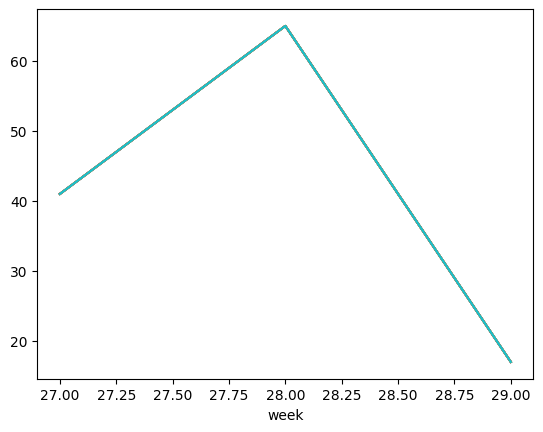

In [44]:
agent.run(input='chart how many work items per week have a resolved date after July 2023, by week. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead')

In [45]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.')



> Entering new AgentExecutor chain...
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation:     Resolved Date  counts
0             1.0     166
1             2.0     217
2             3.0     276
3             4.0     254
4             5.0     329
5             6.0     372
6             7.0     260
7             8.0     331
8             9.0     265
9            10.0     235
10           11.0     208
11           12.0     186
12           13.0     203
13           14.0     204
14           15.0     130
15           16.0     162
16           17.0     203
17           18.0     180
18           19.0     219
19           20.0     237
20           21.0     193
21           22.0     212
22           23.0     273
23           24.0    

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation:     Resolved Date  counts
0             1.0     166
1             2.0     217
2             3.0     276
3             4.0     254
4             5.0     329
5             6.0     372
6             7.0     260
7             8.0     331
8             9.0     265
9            10.0     235
10           11.0     208
11           12.0     186
12           13.0     203
13           14.0     204
14           15.0     130
15           16.0     162
16           17.0     203
17           18.0     180
18   

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks.
Thought: I should first find the count of resolved dates per week, and then use monte carlo analysis to determine the likelihood of 50 work items having a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input: throughput_by_week = df.groupby(df['Resolved Date'].dt.week).size().reset_index(name='counts')
Observation: 
Thought:

> Finished chain.


<string>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


'Agent stopped due to iteration limit or time limit.'

In [46]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the likelihood that 50 work items will have a resolved date in the next 6 weeks. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead')



> Entering new AgentExecutor chain...
Thought: I should find the number of items in the last 6 weeks, then multiply by 50 to get the throughput.
Action: python_repl_ast
Action Input: df['Resolved Date'].dt.isocalendar().week
Observation: 0        32
1        33
2        33
3        33
4        33
         ..
12140    31
12141    39
12142    48
12143    48
12144    48
Name: week, Length: 12145, dtype: UInt32
Thought:Action: python_repl_ast
Action Input: df['Resolved Date'].dt.isocalendar().week.value_counts()
Observation: 6     372
8     331
5     329
31    314
29    307
30    305
51    304
3     276
23    273
9     265
7     260
4     254
49    250
50    243
20    237
10    235
28    234
34    229
24    226
19    219
2     217
25    216
22    212
11    208
39    207
26    206
37    205
14    204
17    203
13    203
21    193
12    186
27    184
35    183
18    180
46    179
48    176
45    176
32    172
1     166
16    162
36    159
40    155
52    151
42    146
44    142
38    141
4

'1.0'

In [51]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead')



> Entering new AgentExecutor chain...
Thought: I should first extract the resolved date column from `df` and convert it to a datetime type. Then, I should use `df.Resolved Date.dt.isocalendar().week` to get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates = df["Resolved Date"].astype("datetime64")`
Observation: 
Thought:

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead
Thought: I should first extract the resolved date column from `df` and convert it to a datetime type. Then, I should use `df.Resolved Date.dt.isocalendar().week` to get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates = df["Resolved Date"].astype("datetime64")`
Observation: 
Thought:

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I can use `resolved_dates.dt.isocalendar().week.value_counts()` to get the count of resolved dates for each week.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week.value_counts()`
Observation: 6     372
8     331
5     329
31    314
29    307
30    305
51    304
3     276
23    273
9     265
7     260
4     254
49    250
50    243
20    237
10    235
28    234
34    229
24    226
19    219
2     217
25    216
22    212
11    208
39    207
26    206
37    205
14    204
17    203
13    203
21    193
12    186
27    184
35    183
18    180
46    179
48    176
45    176
32    172
1     166
16    162
36    159
40    155
52    151
42    146
44    142
38    141
41    134
33    131
15    130
43    128
47    100
53     38
Name: week, dtype: Int64
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of lik

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I can use `resolved_dates.dt.isocalendar().week.value_counts()` to get the count of resolved dates for each week.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week.value_counts()`
Observation: 6     372
8     331
5     329
31    314
29    307
30    305
51    304
3     276
23    273
9     265
7     260
4     254
49    250
50    243
20    237
10    235
28    234
34    229
24    226
19    219
2     217
25    216
22    212
11    208
39    207
26    206
37    205
14    204
17    203
13    203
21    193
12    186
27    184
35    183
18    180
46    179
48    176
45    176
32    172
1     166
16    162
36    159
40    155
52    151
42    146
44    142
38    141
41    134
33    131
15    130
43    128
47    100
53     38
Name: week, dtype: Int64
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of lik

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I should now get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week`
Observation: 0        32
1        33
2        33
3        33
4        33
         ..
12140    31
12141    39
12142    48
12143    48
12144    48
Name: week, Length: 12145, dtype: UInt32
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead
Thought: I should use `resolved_dates.isocalendar().week.value_counts()` to get the count of resolved dates for each week.
Action: python_repl_ast
Action Input: `resolved_dates.isocalendar().week.value_counts()`
Observation: AttributeError: 'Series' object has no attribute 'isocalendar'
Thought:Question: Using t

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I should now get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week`
Observation: 0        32
1        33
2        33
3        33
4        33
         ..
12140    31
12141    39
12142    48
12143    48
12144    48
Name: week, Length: 12145, dtype: UInt32
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead
Thought: I should first extract the resolved date column from `df` and convert it to a datetime type. Then, I should use `df.Resolved Date.dt.isocalendar().week` to get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates = df["Resolved Date"].astype("datetime64")`
O

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I should use `resolved_dates.dt.isocalendar().week.value_counts()` to get the count of resolved dates for each week.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week.value_counts()`
Observation: 6     372
8     331
5     329
31    314
29    307
30    305
51    304
3     276
23    273
9     265
7     260
4     254
49    250
50    243
20    237
10    235
28    234
34    229
24    226
19    219
2     217
25    216
22    212
11    208
39    207
26    206
37    205
14    204
17    203
13    203
21    193
12    186
27    184
35    183
18    180
46    179
48    176
45    176
32    172
1     166
16    162
36    159
40    155
52    151
42    146
44    142
38    141
41    134
33    131
15    130
43    128
47    100
53     38
Name: week, dtype: Int64
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of 

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


Thought: I should now get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates.dt.isocalendar().week`
Observation: 0        32
1        33
2        33
3        33
4        33
         ..
12140    31
12141    39
12142    48
12143    48
12144    48
Name: week, Length: 12145, dtype: UInt32
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead
Thought: I should first extract the resolved date column from `df` and convert it to a datetime type. Then, I should use `df.Resolved Date.dt.isocalendar().week` to get the week of the year for each resolved date.
Action: python_repl_ast
Action Input: `resolved_dates = df["Resolved Date"].astype("datetime64")`
O

<string>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead


'Agent stopped due to iteration limit or time limit.'

In [62]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')



> Entering new AgentExecutor chain...
Thought: I need to use the count of resolved date per week as throughput and use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%.
Action: python_repl_ast
Action Input: import numpy as np
import pandas as pd

# Create a dataframe with the resolved date
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'])

# Create a dataframe with the week of the year for the resolved date
df['Week of Year'] = df['Resolved Date'].dt.isocalendar().week

# Create a dataframe with the count of resolved date per week
throughput = df['Week of Year'].value_counts()

# Create a list of possible number of work items in the next 6 weeks
possible_number_of_work_items = np.arange(1, 100, 1)

# Create a list of the probability of each number of work items
probability_of_work_items = []

# Iterate over the list of possible number of work items
for number_of_w

'39'

In [63]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Gropu results by Area path. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')



> Entering new AgentExecutor chain...
Thought: I need to first group the data frame by Area Path and then apply the count function on the Resolved Date column. After that I will need to convert the Resolved Date column to week of year and use that to count the number of resolved dates in each week.
Action: python_repl_ast
Action Input: df.groupby('Area Path')['Resolved Date'].count()
Observation: Area Path
AR-8465800115       1
AR-8465801115    2959
AR-8465804648      72
AR-8465804649     250
AR-8465804650     206
AR-8465804651     201
AR-8465804652     166
AR-8465804653      84
AR-8465806783       1
AR-8465807965       1
AR-8465808112       2
AR-8465809115      54
AR-8465810103     750
AR-8465810115       5
AR-8465810116      25
AR-8465811103      76
AR-8465811110      29
AR-8465814110      37
AR-8465814111     165
AR-8465814115      15
AR-8465814116     360
AR-8465814121      16
AR-8465814648     358
AR-8465814649      88
AR-8465814650     158
AR-8465815116       8
AR-8465816115   

'ValueError: `axis` must be fewer than the number of dimensions (1)'

In [68]:
agent.run(input='Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Gropu results by Area path. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead')



> Entering new AgentExecutor chain...
Thought: I should first group the data by Area Path and then count the number of resolved dates per week.
Action: python_repl_ast
Action Input: `df.groupby('Area Path')['Resolved Date'].dt.isocalendar().week.value_counts()`
Observation: AttributeError: 'SeriesGroupBy' object has no attribute 'dt'
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Gropu results by Area path. Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead
Thought: I should first group the data by Area Path and then count the number of resolved dates per week.
Action: python_repl_ast
Action Input: `df['Resolve

'I am unable to answer this question as the code is not able to run due to an error.'

In [69]:
agent.run(input="""Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Group results by Area path. Consider using the code df.groupby('Area Path')['Resolved Date'].agg(lambda x: x.dt.isocalendar().week.value_counts()).reset_index(name='count'). Avoid depracated functions such as Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead""")



> Entering new AgentExecutor chain...
Thought: I should first group the data by Area Path and then count the number of resolved dates per week.
Action: python_repl_ast
Action Input: df.groupby('Area Path')['Resolved Date'].reset_index().dt.isocalendar().week.value_counts()
Observation: AttributeError: 'SeriesGroupBy' object has no attribute 'reset_index'
Thought:Question: Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Group results by Area path. Consider proper syntax such as use the reset_index() method to convert the SeriesGroupBy object to a Series object before calling the dt.isocalendar().week.value_counts() method. df.groupby('Area Path')['Resolved Date'].reset_index().dt.isocalendar().week.value_counts(). Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().w

"df.groupby('Area Path')['Resolved Date'].agg(lambda x: x.dt.isocalendar().week.value_counts()).reset_index(name='count')"

In [70]:
agent.run(input="""Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%. Group results by Area path. Consider using the code df.groupby('Area Path')['Resolved Date'].agg(lambda x: x.dt.isocalendar().week.value_counts()).reset_index(name='count'). Avoid depracated functions such as Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass datetime64[ns] instead""")



> Entering new AgentExecutor chain...
Thought: I should first group the data by Area Path and then count the number of resolved dates per week.
Action: python_repl_ast
Action Input: df.groupby('Area Path')['Resolved Date'].agg(lambda x: x.dt.isocalendar().week.value_counts()).reset_index(name='count')
Observation:         Area Path                                              count
0   AR-8465800115                                                  1
1   AR-8465801115  [158, 144, 120, 120, 114, 111, 105, 99, 97, 87...
2   AR-8465804648                  [21, 19, 15, 5, 4, 2, 2, 2, 1, 1]
3   AR-8465804649  [48, 39, 34, 25, 21, 18, 17, 17, 14, 14, 1, 1, 1]
4   AR-8465804650  [58, 35, 31, 30, 17, 13, 6, 5, 3, 2, 1, 1, 1, ...
5   AR-8465804651            [51, 39, 32, 31, 19, 16, 5, 5, 1, 1, 1]
6   AR-8465804652                [51, 38, 29, 17, 17, 7, 2, 2, 2, 1]
7   AR-8465804653            [12, 10, 10, 9, 9, 9, 8, 5, 5, 5, 1, 1]
8   AR-8465806783                                            

'I apologize, but I cannot answer this question as the data provided does not contain information about the next 6 weeks. Therefore, I cannot determine the highest number of work items that will have a resolved date in the next 6 weeks with a high degree of likelihood greater than 90%.'

In [71]:
agent.run(input='For each area path in the dataframe df, Using the count of resolved date per week as throughput, use monte carlo analysis to determine the highest number of work items will have a resolved date in the next 6 weeks with the following degrees of likelihood greater than 70%, greater than 80%, and greater than 90%. ignore values of nan')



> Entering new AgentExecutor chain...
Thought: I should first filter the dataframe to only include rows where the Resolved Date is not null, then group the data by Area Path and Week of Year, and count the number of rows in each group. Then, I can use the Monte Carlo simulation to generate a distribution of possible throughput values for each Area Path, and use this distribution to calculate the likelihood that a given number of work items will have a resolved date in the next 6 weeks.
Action: python_repl_ast
Action Input:
```TOOL_CALL
df_filtered = df[df['Resolved Date'].notnull()]
df_grouped = df_filtered.groupby(['Area Path', df['Resolved Date'].dt.isocalendar().week])['Resolved Date'].count().reset_index()
df_grouped.columns = ['Area Path', 'Week of Year', 'Throughput']

```
Observation: NameError: name 'TOOL_CALL' is not defined
Thought:Question: For each area path in the dataframe df, Using the count of resolved date per week as throughput, use monte carlo analysis to determine

'Area Path: AR-8465878480\nLikelihood: 70%\nHighest number of work items: 1.0\nArea Path: AR-8465878480\nLikelihood: 80%\nHighest number of work items: 1.0\nArea Path: AR-8465878480\nLikelihood: 90%\nHighest number of work items: 1.0'

Simpler PythonAstREPLTool

In [159]:
from langchain.memory import ConversationBufferMemory
from langchain.agents.openai_functions_agent.base import OpenAIFunctionsAgent
from langchain.schema import SystemMessage
from langchain.agents import AgentExecutor

In [163]:
memory = ConversationBufferMemory(memory_key="chat_history")
df = pd.read_csv('../../ado_backlog_clean.csv')
dataset = {'df': df}
pytool = PythonAstREPLTool(locals=dataset)
tools = [pytool, DocumentQATool()]
prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix="",
    suffix="{agent_scratchpad}"
    )
llm_chain = LLMChain(
    llm=llm,
    prompt=partial_prompt,
)
tool_names = [tool.name for tool in tools]
zeroshotagent = ZeroShotAgent(
    llm_chain=llm_chain,
    tools=tool_names,
    handle_parsing_errors=True
)

In [164]:
agent = AgentExecutor.from_agent_and_tools(
    agent=zeroshotagent,
    tools=tools, 
    verbose=True,
    memory=memory,
    handle_parsing_errors=True
    )

In [ ]:
agent.run(input="how many rows are in the dataframe?")

ONe Cell

In [ ]:
from langchain_experimental.tools import PythonAstREPLTool
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain.llms import OpenAI
from langchain.llms import VertexAI
import vertexai
import pandas as pd
import numpy as np

from langchain.agents.mrkl.base import ZeroShotAgent
from langchain.chains.llm import LLMChain
from langchain.agents import Tool
from langchain.document_loaders import TextLoader, CSVLoader
from langchain.chains.question_answering import load_qa_chain
from langchain.tools import BaseTool

llm = GoogleGenerativeAI(model="gemini-pro",temperature=0, google_api_key=os.getenv("GOOGLE_API_KEY"))

loader = CSVLoader('../../ado_backlog_clean.csv')
docchain = load_qa_chain(llm, chain_type="stuff")

# create document QA tool
class DocumentQATool(BaseTool):
    name='document'
    description='read contents from page content'
    
    def _run(self, query):
        return docchain.run(question=query, input_documents=loader.load(), 
                            return_only_outputs=True, verbose=True)
    
    def _arun(self, query):
        raise NotImplementedError('Not implemented')

df = pd.read_csv('../../ado_backlog_clean.csv')

pytool = PythonAstREPLTool(locals={"df": df})

# create agent input and prompt Way too many tokens because I think it's trying to put the whole dataframe into the prefix prompt!!!!
tools = [pytool, DocumentQATool()]
input_variables = ["df", "input", "agent_scratchpad"]
        
prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix='''You are working with python pandas DataFrame with variable name `df`,
and reading from the document text from the document loader. You should solve
the question by small steps and use the tools available. It is important to understand the attributes and datatypes of the dataframe before working with it. This is the result of running `df.head().to_markdown()`
    ''',
    suffix='''Here's the result of `print(df.head())`:
{df}

You are not meant to use only these rows to answer questions - they are meant as a way of telling you about the shape and schema of the dataframe.
You also do not have use only the information here to answer questions - you can run intermediate queries to do exporatory data analysis to give you more information as needed.
avoide using depracated functions, such as Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead, and Passing unit-less datetime64 dtype to .astype is deprecated and will raise errors in a future version thus pass datetime64[ns] instead.

Begin!
Question: {input}
{agent_scratchpad}
    ''', 
    input_variables=input_variables
)
partial_prompt = prompt.partial(df=str(df.head().to_markdown()))

llm_chain = LLMChain(
    llm=llm,
    prompt=partial_prompt,
)
tool_names = [tool.name for tool in tools]
zeroshotagent = ZeroShotAgent(
    llm_chain=llm_chain,
    tools=tool_names,
    handle_parsing_errors=True
)

from langchain.agents.agent import AgentExecutor

agent = AgentExecutor.from_agent_and_tools(
    agent=zeroshotagent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True
)

agent.run(input='how many rows are in the dataset with a state of new?')